In [1]:
from stockfish import Stockfish
import chess.pgn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# stockfish init
stockfish = Stockfish(
    'stockfish_14_linux_x64/stockfish_14_linux_x64/stockfish_14_x64', 
    parameters={"Threads": 2, 'Min Split Depth': 26, 'Ponder':True}
)
stockfish.set_elo_rating(2600)
stockfish.set_skill_level(30)

In [3]:
stockfish.get_parameters()

{'Write Debug Log': 'false',
 'Contempt': 0,
 'Min Split Depth': 26,
 'Threads': 2,
 'Ponder': True,
 'Hash': 16,
 'MultiPV': 1,
 'Skill Level': 30,
 'Move Overhead': 30,
 'Minimum Thinking Time': 20,
 'Slow Mover': 80,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 2600}

In [4]:
# read from pgn file
# iterate through moves
# get stockfish cpl
# generate dict? turn, move, eval
# df
# acpl
# viz plot against lichess

In [5]:
# read game
def read_pgn():
    pgn = open("data/lichess_pgn_2021.10.27_Vknee_vs_AlfredoRebG.5fdfRg20.pgn", encoding='UTF-8')
    first_game = chess.pgn.read_game(pgn)
    board = first_game.board()
    moves = list(first_game.mainline_moves())
#     scores = chess.engine.PovScore(chess.engine.Score, chess.Color)
#     print(nodes)
    print(first_game)
    return first_game, board, moves # , nodes

In [6]:
game, board, moves = read_pgn()

turn = 0
for move in moves:
    board.push(move)

#     print(move, nodes.pov(chess.Color, 'White'))
    if turn == 0:
        turn = 1
    else:
        turn = 0
#     print(move)
#     print(node)

[Event "Rated Rapid game"]
[Site "https://lichess.org/5fdfRg20"]
[Date "2021.10.27"]
[Round "?"]
[White "Vknee"]
[Black "AlfredoRebG"]
[Result "1-0"]
[Annotator "lichess.org"]
[BlackElo "1575"]
[BlackRatingDiff "-5"]
[ECO "B01"]
[Opening "Scandinavian Defense: Mieses-Kotroc Variation"]
[Termination "Normal"]
[TimeControl "600+0"]
[UTCDate "2021.10.27"]
[UTCTime "21:59:19"]
[Variant "Standard"]
[WhiteElo "1615"]
[WhiteRatingDiff "+17"]

1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... d5 $6 { (0.24 → 0.82) Inaccuracy. e5 was best.
[%eval 0.82] [%clk 0:10:00] } ( 1... e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. d4 Nd6 6. Bxc6 ) 2. exd5 { [%eval 0.36] [%clk 0:09:58] } 2... Qxd5 { [%eval 0.66] [%clk 0:09:59]
B01 Scandinavian Defense: Mieses-Kotroc Variation } 3. Nc3 { [%eval 0.46] [%clk 0:09:57] } 3... Qd8 { [%eval 0.72] [%clk 0:09:57] } 4. d4 { [%eval 0.55] [%clk 0:09:55] } 4... Nf6 { [%eval 0.8] [%clk 0:09:54] } 5. Nf3 { [%eval 0.72] [%clk 0:09:38] } 5... e6 { [%eval 0.91] [%clk 0:09:48] } 6. Bd3 

In [7]:
def log_events():    
    game, board, moves = read_pgn()
    move_list = [str(move) for move in moves]

    log_dict = {
        'moves': [],
        'type': [],
        'cp': [],
#         'comments': [],
        'turn':[],
        'player': []
    }

    white = True
    turn = 1
    
    # logs
    for move in moves:
        log_dict['turn'].append(turn)
        board.push(move)
#         log_dict['comments'].append()
        if white:
            log_dict['player'].append('White')
            white = False
        else:
            log_dict['player'].append('Black')
            white = True
            turn += 1
        
        log_dict['moves'].append(str(move))
        stockfish.set_fen_position(board.fen())  # fetch chess.pgn.board.fen to set stockfish position
        cpl = stockfish.get_evaluation()['value']/100
        log_dict['cp'].append(round(cpl, 2))
        log_dict['type'].append(stockfish.get_evaluation()['type'])
    game.board
        
    return log_dict

In [8]:
log_dict = log_events()
df_game = pd.DataFrame(log_dict)
df_game.index += 1  # turn index into half-turns
df_game

[Event "Rated Rapid game"]
[Site "https://lichess.org/5fdfRg20"]
[Date "2021.10.27"]
[Round "?"]
[White "Vknee"]
[Black "AlfredoRebG"]
[Result "1-0"]
[Annotator "lichess.org"]
[BlackElo "1575"]
[BlackRatingDiff "-5"]
[ECO "B01"]
[Opening "Scandinavian Defense: Mieses-Kotroc Variation"]
[Termination "Normal"]
[TimeControl "600+0"]
[UTCDate "2021.10.27"]
[UTCTime "21:59:19"]
[Variant "Standard"]
[WhiteElo "1615"]
[WhiteRatingDiff "+17"]

1. e4 { [%eval 0.24] [%clk 0:10:00] } 1... d5 $6 { (0.24 → 0.82) Inaccuracy. e5 was best.
[%eval 0.82] [%clk 0:10:00] } ( 1... e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. d4 Nd6 6. Bxc6 ) 2. exd5 { [%eval 0.36] [%clk 0:09:58] } 2... Qxd5 { [%eval 0.66] [%clk 0:09:59]
B01 Scandinavian Defense: Mieses-Kotroc Variation } 3. Nc3 { [%eval 0.46] [%clk 0:09:57] } 3... Qd8 { [%eval 0.72] [%clk 0:09:57] } 4. d4 { [%eval 0.55] [%clk 0:09:55] } 4... Nf6 { [%eval 0.8] [%clk 0:09:54] } 5. Nf3 { [%eval 0.72] [%clk 0:09:38] } 5... e6 { [%eval 0.91] [%clk 0:09:48] } 6. Bd3 

,moves,type,cp,turn,player
1,e2e4,cp,0.03,1,White
2,d7d5,cp,0.59,1,Black
3,e4d5,cp,-0.05,2,White
4,d8d5,cp,8.30,2,Black
5,b1c3,cp,0.50,3,White
6,d5d8,cp,1.07,3,Black
7,d2d4,cp,0.55,4,White
8,g8f6,cp,1.03,4,Black
9,g1f3,cp,0.91,5,White
10,e7e6,cp,1.24,5,Black


In [9]:
def viz_advantage(df):
    plot_df = df.iloc[:np.where(df.type=='mate')[0][0]]  # avoid mate # notation in cp calculation
    plt.plot(plot_df['cp'])
    plt.plot(np.zeros(plot_df['cp'].shape))
    plt.xlabel('turns')
    plt.ylabel('margin')
    plt.title('Advantage - pos=white, neg=black')
    plt.grid()  # positive = white advantage, negative = black advantage
    plt.show()

In [10]:
viz_advantage(df_game)

IndexError: index 0 is out of bounds for axis 0 with size 0

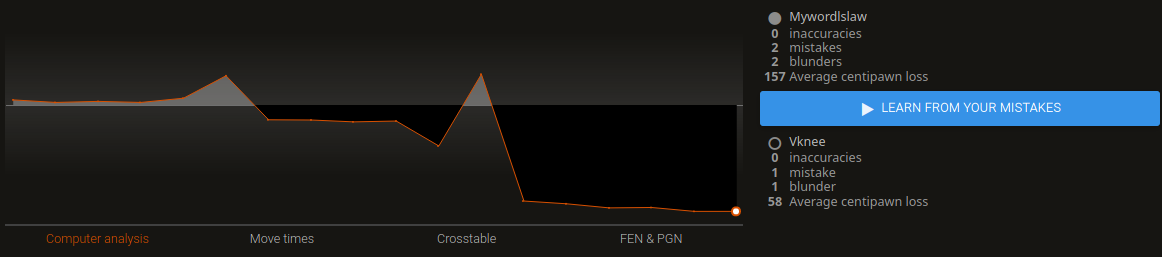

In [ ]:
#TODO eval directly from pgn file with chess.pgn lybrary ?
#TODO look at JSONs again and try to parse eval from pgn
#TODO eval diff of cp ?

In [ ]:
acpl = df_game.groupby('player').sum()/len(df_game.player)
acpl.drop('turn', axis=1, inplace=True)
acpl

### evals

In [18]:
pgn = open("data/lichess_pgn_2021.10.27_Vknee_vs_AlfredoRebG.5fdfRg20.pgn", encoding='UTF-8')
first_game = chess.pgn.read_game(pgn)
board = first_game.board()
moves = list(first_game.mainline_moves())
# for move in moves:
#     board.push(move)
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [ ]:
pd.DataFrame(moves)

In [ ]:
chess.pgn.GameNode.eval(node)